# Implementing Random Forest :
# Default Credit Card 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credit = pd.read_csv('./credit-card-default.csv')
credit.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
10557,10558,30000,1,2,1,36,0,0,0,0,...,8714,9514,3300,2000,2000,2000,5000,0,0,0
12523,12524,180000,1,1,2,40,0,0,0,0,...,7751,1630,0,6019,1074,2038,819,0,0,0
3897,3898,320000,2,2,1,36,-2,-1,0,0,...,43112,67290,62132,2904,2973,1579,40020,3127,1206,0
19241,19242,30000,2,2,1,42,2,0,0,0,...,13030,13776,13415,1176,1198,1518,1264,0,1308,1
27847,27848,60000,2,2,2,27,0,0,0,2,...,33528,32690,34661,2500,3700,1200,0,2500,2500,0


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


/home/raj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


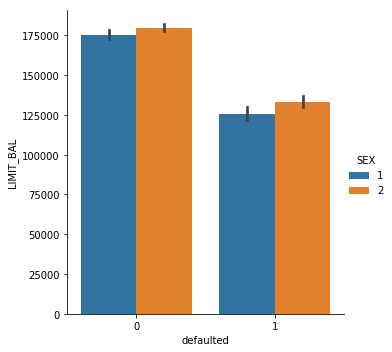

In [4]:
sns.catplot(x='defaulted',y='LIMIT_BAL',hue='SEX',kind='bar',data=credit)

In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier

/home/raj/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
X = credit.drop(['defaulted'],axis=1)
y = credit['defaulted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [8]:
n_folds = 3

rf = RandomForestClassifier()

params = {'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,300,400], 
    'max_features': [5, 10] 
         }

model = GridSearchCV(rf,param_grid=params,cv=n_folds,n_jobs=-1,verbose=1)

model.fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 11.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300, 400], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [9]:
model.best_params_

{'max_depth': 4,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 400}

In [ ]:
rfe_1 = RandomForestClassifier(bootstrap=True,
                                max_depth=4,
                                max_features=10,
                                min_samples_leaf=100,
                                min_samples_split=200,
                                n_estimators=400)
rfe_1.fit(X_train,y_train)

In [14]:
from sklearn import metrics
pred = rfe_1.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.8266666666666667
